#  **NLP INSIGHTS FROM TWEETS OF GENDER EQUALITY**


### **CHOSEN DATA SET: SDG5: GENDER EQUALITY**

# I. INTRODUCTION

In the digital age, social media platforms like Twitter have become powerful tools for public discourse on global issues, including gender equality. This analysis focuses on SDG5: Gender Equality, one of the United Nations Sustainable Development Goals aimed at ending discrimination and violence against women and girls while promoting their equal opportunities in all areas of life. By applying Natural Language Processing (NLP) techniques to tweets related to gender equality, this study aims to uncover common themes, key concerns and frequently discussed topics among users under this theme, thus founding out how gender equality is represented and discussed online to identify the major issues and public perceptions surrounding this theme.

# II. DATA PRE-PROCESSING

The first step needed to be done is data pre-processing, which involve loading the data set into the notebook and cleaning unnecessary noise to ensure the content is suitable for analysis.

In [5]:
#!pip install numpy==1.24.4
# This is because the default version of numpy isn't compatible with gensim library,
# so it might need to restart the session to re-install this new version of numpy

## 1. Data Loading

In [6]:
# Loading primary libraries.
import pandas as pd

In [7]:
#Directly uploading the data set into Google Colab
from google.colab import files
uploaded = files.upload()

Saving SDG5_Gender_Equality.xlsx to SDG5_Gender_Equality (2).xlsx


In [8]:
#Reading data set into data frame
df = pd.read_excel('SDG5_Gender_Equality.xlsx')
df.head()

,SDG,Keyword,Tweet_ID,Username,User_ID,Text,Created_At,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive,day,Text_Length
0,SDG5_Gender_Equality,Women Empowerment,1912495955242287126,Merica 🦋💞,1210370714,Katy Perry and Gayle King go for a ride in a *...,2025-04-16 13:19:02+00:00,NaN,en,206,306,34,7,False,0.0,2025-04-16,627
1,SDG5_Gender_Equality,Women Empowerment,1915387711894024483,Prince,1796964152226775040,Saint Dr MSG Insan started many initiative for...,2025-04-24 12:49:51+00:00,"SelfDefense,WomenEmpower,SelfDefenseTraining,i...",en,7,6,0,0,False,0.0,2025-04-24,299
2,SDG5_Gender_Equality,Women Empowerment,1912415564443897911,Ever & Forever for Nayan 👀💫❤️,1605198841359503360,She can still be a MOTHER \nShe can still be a...,2025-04-16 07:59:36+00:00,NaN,en,15,70,2,0,False,0.0,2025-04-16,309
3,SDG5_Gender_Equality,Women Empowerment,1915247582630043794,Bal Sanskar Kendra,234845339,Ashram Matters - it is epicenter of 50+ Years ...,2025-04-24 03:33:01+00:00,RightToWorship,en,313,330,27,1,False,0.0,2025-04-24,296
4,SDG5_Gender_Equality,Women Empowerment,1913669920166232307,Farhan Chaudary,925287024608858112,Space mission or PR stunt? Rich women paid $11...,2025-04-19 19:03:57+00:00,KATYPERRYINSPACE,en,1,5,1,0,False,0.0,2025-04-19,303


In [9]:
#Viewing summary of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5858 entries, 0 to 5857
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SDG                 5858 non-null   object        
 1   Keyword             5858 non-null   object        
 2   Tweet_ID            5858 non-null   int64         
 3   Username            5858 non-null   object        
 4   User_ID             5858 non-null   int64         
 5   Text                5858 non-null   object        
 6   Created_At          5858 non-null   object        
 7   Hashtags            1755 non-null   object        
 8   Language            5858 non-null   object        
 9   Retweet_Count       5858 non-null   int64         
 10  Favorite_Count      5858 non-null   int64         
 11  Reply_Count         5858 non-null   int64         
 12  Quote_Count         5858 non-null   int64         
 13  Is_Quote_Status     5858 non-null   bool        

After inspecting the dataset, it's clear that most key columns like Text, Tweet_ID, Username, Language, as well as all engagement metrics of Retweet_Count, Favorite_Count, Reply_Count, Quote_Count have complete data with no missing values. However, the Hashtags column has only 1,755 non-null rows out of 5,857 rowa, indicating that around 70% of the tweets don't have hashtags. Furthermore, the Possibly_Sensitive column has 3,608 non-null rows, meaning around 38% of the data is missing. Nonetheless, since the focus of this task is on text pre-processing using the Text column, which has non null value, no further handling of missing values was necessary.

## 2. Text Pre-processing

This task will focus on cleaning the 'Text' content by removing noise like URLs or symbols, converting text to lowercase for consistency, and preparing the text through steps like tokenization, stop word removal, and lemmatization to ensure it is ready for reliable NLP analysis.

### 2.1. Removing Duplicate

Given that there is nearly 6000 rows in the data set, which are collected from Tweeter posts, duplicated values might appear in the data set due to potential data collection errors, repeated posted or user reposts, which are very common in the social media posts context. Therefore, to avoid repeated word patterns that causes biased word frequency counts or distorted topic modeling outcomes, the Removing Duplicate approach will be applied on the "Text" column in the data set.

In [10]:
#Check duplicate tweets count
duplicate_count = len(df['Text'])-len(df['Text'].drop_duplicates())
print('duplicate count:', duplicate_count)
print('total records before remove duplicates:', df.shape[0])

duplicate count: 12
total records before remove duplicates: 5858


In [11]:
#Drop duplicates and keep the last tweet of each of the duplicates
df = df.drop_duplicates(subset='Text', keep="first")
print('updated record count:', df.shape[0])

updated record count: 5846


By that, 113 duplicated tweet content in the "Text" column were removed, making the data set only has 5745 entries left.

### 2.2. Converting "Text" into lowercase

Since the 'Text' column contains the content of collected tweets, converting all text to lowercase ensures consistent formatting, allowing machines to read and analyze the data more effectively.

In [12]:
df['Text'] = df['Text'].str.lower()
df['Text'].head()

<ipython-input-12-5d7fa3673db1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].str.lower()


,Text
0,katy perry and gayle king go for a ride in a *...
1,saint dr msg insan started many initiative for...
2,she can still be a mother \nshe can still be a...
3,ashram matters - it is epicenter of 50+ years ...
4,space mission or pr stunt? rich women paid $11...


### 2.3. Removing Regular Expressions

To further refine and standardize the tweet content, regular expressions are used to eliminate common noise elements such as:

- URLs/Links (https://t.co/...) as they carry no useful meaning for text analysis.  
- Mentions (@user) as they just add clutter without contributing to the core message.  
- Hashtags(#topic) as they are already stored separately in the 'Hashtags' column.  
- Emojis and non-ASCII characters as they can be inconsistently interpreted and introduce unnecessary tokens.  
- Extra spaces as they introduce more noise to tokenization and word counting.

This approach then helps keep only relevant content in the 'Text' column, improving the quality and performance of later text analysis steps.

In [13]:
import re

def clean_tweet(text):
    # Removing URLs (https://t.co/...)
    text = re.sub(r'http\S+|www\S+', '', text)

    # Removing mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Removing hastags (#topic)
    text = re.sub(r'#\w+', '', text)

    # Removing emojis and non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Removing extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [14]:
df['Text'] = df['Text'].apply(clean_tweet)
df['Text'].head()

,Text
0,katy perry and gayle king go for a ride in a s...
1,saint dr msg insan started many initiative for...
2,she can still be a mother she can still be an ...
3,ashram matters it is epicenter of 50 years of ...
4,space mission or pr stunt rich women paid 11m ...


### 2.4. Removing Digits

Digits like count, numbers or dates are also removed from the tweet content in "Text" column to eliminate numerical noise that typically doesn't contribute meaningful context to the NLP insights.

In [15]:
def remove_digits(sent):
  return " ".join(w for w in sent.split() if not w.isdigit())

df['Text'] = df['Text'].apply(remove_digits)
df['Text'].head()

,Text
0,katy perry and gayle king go for a ride in a s...
1,saint dr msg insan started many initiative for...
2,she can still be a mother she can still be an ...
3,ashram matters it is epicenter of years of sev...
4,space mission or pr stunt rich women paid 11m ...


### 2.5. Spelling Correction

Given that these text are tweet content, which are often writen quickly and casually on mobile devices, they narurally have lot of typos, slangs and informal language. This can make word patterns in the text becmoing less meaningful, as well as reducing the accuracy of word frequency as in several cases, 1 word pattern can be splitted into 2 due to typo or slang usage. For that reason, spelling correction is needed to correct any mispelled words in the "Text" column, thus nomarlising in tweet content for more accurate analysis and extracted insights in the later process.

**Method 1: TextBlob library**

The first method being used in this task is using TextBlob library. To ensure the effectiveness of this library in correcting words, it will be tested with a sample of 5 rows in the data set before applying it on the whole data set.

In [16]:
from textblob import TextBlob

# Defining the function for spelling correction
def correct_spelling_textblob(text):
    return str(TextBlob(text).correct())

# Take a sample of the first 5 rows
sample_df = df[['Text']].head(5).copy()

# Apply spelling correction
sample_df['corrected_text'] = sample_df['Text'].apply(correct_spelling_textblob)

# Print original vs corrected text
for i, row in sample_df.iterrows():
    print(f"Original:   {row['Text']}")
    print(f"Corrected:  {row['corrected_text']}\n")

Original:   katy perry and gayle king go for a ride in a shaped rocket to support women empowerment isnt it funny how they are only climate activists when it fits their agenda eloise marais a professor of atmospheric chemistry and air quality at university college says it only takes a few minutes in space travel to emit at least as much carbon as an individual from the bottom billion will emit in their entire lifetime i dont want to hear any other word from katy perry or gayle king about how our climate is being destroyed by carbon emissions these women humorously sum up the celebrity space ride
Corrected:  kate perry and gale king go for a ride in a shaped rocket to support women empowerment isn it funny how they are only climate activist when it fits their agenda heloise paris a professor of atmosphere chemistry and air quality at university college says it only takes a few minutes in space travel to emit at least as much carbon as an individual from the bottom billion will emit in t

From the results above, it's clear that TextBlob performed poorly in correcting mispelled words from informal, user generated content like tweets. In details, it frequently misinterprets proper nouns and name like changing "katy perry" to "kate perry" and "ashram" to "astray", which alters the original meaning significantly. Moreover, it wasn't able to recognise domain and culture related terms like "msg insan" and "mahila utthan mandal", thus converting them into nonsensical phrases like "mug insane" and "manila than manual". Grammar structure is also affected, with auxiliary verbs and contractions like "isn't" being reduced to "isn," leading to ungrammatical output. As a result, despite few accurate corrections, the overall inconsistency and contextual inaccuracy make TextBlob unsuitable for reliable spelling correction in tweet data.

**Method 2: SymSpell library**

Another method being considered to be used in this task is using SymSpell library. Similar to TextBlob, this method is also applied on a sample of 5 rows in the data set to test the accuracy in correcting mispelled words before applying it on the whole data set.

In [17]:
!pip install symspellpy
!wget https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_dictionary_en_82_765.txt

--2025-05-05 07:52:25--  https://raw.githubusercontent.com/mammothb/symspellpy/master/symspellpy/frequency_dictionary_en_82_765.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1332879 (1.3M) [text/plain]
Saving to: ‘frequency_dictionary_en_82_765.txt.1’

frequency_dictionar 100%[===================>]   1.27M  --.-KB/s    in 0.008s  

2025-05-05 07:52:25 (160 MB/s) - ‘frequency_dictionary_en_82_765.txt.1’ saved [1332879/1332879]



In [18]:
from symspellpy import SymSpell, Verbosity

# Initialize SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Load dictionary
dictionary_path = "frequency_dictionary_en_82_765.txt"
term_index = 0  # column of the term
count_index = 1  # column of term frequency
sym_spell.load_dictionary(dictionary_path, term_index, count_index)

True

In [19]:
def correct_spelling_symspell(text):
    result = sym_spell.lookup_compound(text.lower(), max_edit_distance=2)
    return result[0].term if result else text

# Apply to a small sample for demo
sample_df = df[['Text']].head(5).copy()
sample_df['corrected_text'] = sample_df['Text'].apply(correct_spelling_symspell)

# Display result
for i, row in sample_df.iterrows():
    print(f"Original:   {row['Text']}")
    print(f"Corrected:  {row['corrected_text']}\n")

Original:   katy perry and gayle king go for a ride in a shaped rocket to support women empowerment isnt it funny how they are only climate activists when it fits their agenda eloise marais a professor of atmospheric chemistry and air quality at university college says it only takes a few minutes in space travel to emit at least as much carbon as an individual from the bottom billion will emit in their entire lifetime i dont want to hear any other word from katy perry or gayle king about how our climate is being destroyed by carbon emissions these women humorously sum up the celebrity space ride
Corrected:  katy perry and gayle king go for a ride in a shaped rocket to support women empowerment int it funny how they are only climate activists when it fits their agenda eloise maris a professor of atmospheric chemistry and air quality at university college says it only takes a few minutes in space travel to emit at least as much carbon as an individual from the bottom billion will emit in

From the results above, it's clear that SymSpell, despite being able to not convert name like "katy perry", "gayle king" and "ashram" to completely different words as TextBlob did, it still performed poorly in correcting mispelled words from informal, user generated content like tweets. In details,it wasn't able to recognise domain and culture related terms like "msg insan" and "mahila utthan mandal", thus converting them into nonsensical phrases like "mag in an" and "manila than manual". It also over corrected words like "pr" to "or", and 11m to pm, which making them having totally different meaning. Moreover, grammar structure is also afftected, with auxiliary verbs and contractions like "isn't" being reduced to "isn," leading to ungrammatical output. This highlights that despite having higher accuracy in correcting words, SymSpell still poorly transformed incorrect words into nonsense or words with different meaning with worse grammar, thus making the tweet content inconsistent and inaccurate for later analysis. This indicates that this method is also not reliable spelling correction in tweet data.


As a result, both methods struggled with informal language, slang and proper nouns, making them not that effective in correcting spelling for social media text like tweets. Given their limitations, it's often better to skip spelling correction and rely on lemmatization and stemming to normalize the text, as these methods handle variations in word forms more effectively in informal contexts.



### 2.6. Removing Sensitive Words

Despite the initial profanity filtering, there may still be offensive content in the dataset, such as political views, sexual references, racial slurs, hate speech and sensitive topics. In the context of NLP exploration for word frequency analysis, these elements can significantly skew the results by inflating the frequency of inappropriate terms, thus introducing bias in topic modeling. Therefore, further filtering is necessary to ensure that the analysis accurately reflects the language and content of interest, while maintaining ethical standards and compliance with data privacy regulations.

**Flagging sensitive words among tweet content**

In [20]:
!pip install better_profanity

In [21]:
from better_profanity import profanity

# Initializing profanity filter
profanity.load_censor_words()

# Function to flag bad words in the 'Text' column
def flag_bad_words(text):
    flagged_words = [word for word in text.split() if profanity.contains_profanity(word)]
    return flagged_words

# Applying flagging to the data set
df['flagged_words'] = df['Text'].apply(flag_bad_words)

# Printing flagged words to review
print("Flagged Words:")
for index, row in df.iterrows():
    if row['flagged_words']:  # Only print rows with flagged words
        print(f"Tweet: {row['Text']}")
        print(f"Flagged Words: {row['flagged_words']}\n")


Flagged Words:
Tweet: i have a message to the music industry stop hiring stood by a domestic violence survivor when no one else would fuck rihanna
Flagged Words: ['fuck']

Tweet: always weird when ur anti stuff and here comes someone going like this is bad for the gays no its not were not related at all thats a weird thing to think child marriage is soooo accepted by the very societies that would disown and hurt lgbtq people
Flagged Words: ['gays']

Tweet: hi the us pressure on qris is part of standard trade talks not thug behavior the us sees qris as a barrier limiting companies like visa while indonesia defends it for financial inclusion with 267m merchants using it both have valid points the us wants market access and indonesia protects local interests this is a typical trade dispute not bullying though us actions may feel heavyhanded ongoing talks like recent concessions aim to resolve this
Flagged Words: ['thug']

Tweet: the supreme court in the uk has unanimously ruled that the t

From the result above, it's clear that there are still a lot of senstive and inappropriate words among tweet contents in the data set. Nonetheless, not all of them needed to be erased. For example, words related to sexuality like "gays" and "lesbians" should be kept as they directly provide the terms related to gender equality, while words like "fat" can give more context of gender inequality due to apperance. Also, word like "sex" in fact refer to both biological gender and sexual activity, both of which can significantly contribute to identifying key terms and topics related to actions that promote or challenge gender equality. Therefore, these words will be kept to ensure meaningful context for later analysis, while the rest can be erased to avoid sensitive and unappropriate phrases in the future outcomes.

In [22]:
# List of words to retain
retain_words = ['lesbians', 'gays', 'fat', 'sex']

# Function to clean 'Text' column
def clean_text_column(text, bad_words, retain_words):
    words = text.split()
    cleaned = [word for word in words if word not in bad_words or word in retain_words]
    return " ".join(cleaned)

# Applying fuction
df['Text'] = df.apply(lambda row: clean_text_column(row['Text'], row['flagged_words'], retain_words), axis=1)

print("Updated 'Text' column after cleaning:")
print(df['Text'].head())

Updated 'Text' column after cleaning:
0    katy perry and gayle king go for a ride in a s...
1    saint dr msg insan started many initiative for...
2    she can still be a mother she can still be an ...
3    ashram matters it is epicenter of years of sev...
4    space mission or pr stunt rich women paid 11m ...
Name: Text, dtype: object


By that, sensitive and inappropriate words that have no value to the context were removed from the data set.

### 2.7. Stemming and Lemmazilation

As stated above, the Spelling Correction method failed in normalizing and standardizing words in the Text column. Therefore, this issue will be addressed through Stemming and Lemmatization, with the aim to ensure that variations of the same word are reduced to a common root or base form. By that, the consistency in words can be enhanced by treating similar words as one unified term, thus ensuring accuracy in words analysis in the later stages.

**Stemming**

Moving on, stemming is also applied to reduce words to their root form like "running" to "run" to group similar terms, thus reducing redundancy and simplifying noisy tweet text

In [23]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming_function(sent):
  word_list = sent.split()
  stemmed_word_list = [stemmer.stem(word) for word in word_list]
  stemmed_sentence = " ".join(stemmed_word_list)
  return stemmed_sentence

df['stemmed_text'] = df['Text'].apply(stemming_function)

print(df[['Text', 'stemmed_text']].head(10))

                                                Text  \
0  katy perry and gayle king go for a ride in a s...   
1  saint dr msg insan started many initiative for...   
2  she can still be a mother she can still be an ...   
3  ashram matters it is epicenter of years of sev...   
4  space mission or pr stunt rich women paid 11m ...   
5  thank you beautiful warriors for your love and...   
6  so much for supporting womenthis student tried...   
7  the girls are hugging and holding hands togeth...   
8  in todays era women empowerment is key to soci...   
9  admk stands for humanity unity equality social...   

                                        stemmed_text  
0  kati perri and gayl king go for a ride in a sh...  
1  saint dr msg insan start mani initi for women ...  
2  she can still be a mother she can still be an ...  
3  ashram matter it is epicent of year of seva th...  
4  space mission or pr stunt rich women paid 11m ...  
5  thank you beauti warrior for your love and ser... 

**Lemmazilation**

In [24]:
# Download wordnet
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
from nltk.stem import WordNetLemmatizer

lemmtizer = WordNetLemmatizer()

In [26]:
def lemmatize_function(sent, pos='n'):
  word_list = sent.split()
  lemma_word_list = [lemmtizer.lemmatize(word, pos=pos) for word in word_list]
  lemma_sentence = " ".join(lemma_word_list)
  return lemma_sentence

df['lemmatized_text'] = df['Text'].apply(lemmatize_function)

df[['Text', 'stemmed_text', 'lemmatized_text']].head(10)

,Text,stemmed_text,lemmatized_text
0,katy perry and gayle king go for a ride in a s...,kati perri and gayl king go for a ride in a sh...,katy perry and gayle king go for a ride in a s...
1,saint dr msg insan started many initiative for...,saint dr msg insan start mani initi for women ...,saint dr msg insan started many initiative for...
2,she can still be a mother she can still be an ...,she can still be a mother she can still be an ...,she can still be a mother she can still be an ...
3,ashram matters it is epicenter of years of sev...,ashram matter it is epicent of year of seva th...,ashram matter it is epicenter of year of seva ...
4,space mission or pr stunt rich women paid 11m ...,space mission or pr stunt rich women paid 11m ...,space mission or pr stunt rich woman paid 11m ...
5,thank you beautiful warriors for your love and...,thank you beauti warrior for your love and ser...,thank you beautiful warrior for your love and ...
6,so much for supporting womenthis student tried...,so much for support womenthi student tri to sh...,so much for supporting womenthis student tried...
7,the girls are hugging and holding hands togeth...,the girl are hug and hold hand togeth thi titl...,the girl are hugging and holding hand together...
8,in todays era women empowerment is key to soci...,in today era women empower is key to social pr...,in today era woman empowerment is key to socia...
9,admk stands for humanity unity equality social...,admk stand for human uniti equal social justic...,admk stand for humanity unity equality social ...


From the results retrieved from first 10 rows using both methods, it's clear that:

-  Stemming although reduced words to shorter roots, like "empowerment" to "empower" and "humanity" to "human", thus helping grouping word variants to reduce redundancy and simplify noisy tweet text, however, in some cases, it cut words in very unatural way. In details, it cut "initiative" to "initi", "together" to "togeth", "unity" to "uniti" and "beautiful" to "beauti", which are not even real English words, making the tweets harder to read and interpret. Given the sensitive and nuanced nature of gender equality discussions, losing this readability and interpretation can strip away important meaning and emotional tone for accurate and insightful analysis in the later stages.

- Lemmatization, on the other hand, seems to produce more oherent and grammatically correct text, although there isn't intense normalisation happened through this method. For examples, words like "supporting", "empowerment", "hugging" and "holding" are remained the same, while words like "girls" was normalized to "girl" and "women" to "woman". This therefore results in cleaner, more standardized tweet content while keeping intented context and meaning for readiability and interpretation.

Thus, it can be concluded that while stemming may slightly improve compression, lemmatization produces more accurate, readable and meaningful results for this dataset, thus supporting more meaningful and contextual rich insights in the later process. This suggests that "lemmatized_text" will be used from now on in any other pre-processing steps.

### 2.8. Stop words removal

Moving on, after lemmazilation, the column of "lemmatized_text" then will be used to remove any stop words, which are commonly low value words like "the", "and", or "or" which are often included for grammatical structure and sentence flow. While they help form readable sentences, they do not contribute much to the core meaning or help highlight key terms and phrases. By removing them, the tweet content can be clean from noisy words, allowing better detection on important words patterns and phrases that can contribute to the later process.

In [27]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In the context of gender equality discussions on Twitter,  common words like "not" and "no" in fact are crucial in delivering context and phrases of critiques, inequality or unmet demands. Therefore, they can highlight any dissatisfaction and injustices in gender equality. This suggests the need to retain them to capture the full sentiment and context behind these tweet content for more accurate insights into public's stance on gender-related issues in the later analysis stages.


In [28]:
stop = set(stopwords.words('english')) - {'not', 'no', 'nor'}
print(stop)

{'further', 'which', 'aren', 'on', "it'll", "they'd", "we're", 'both', "they're", 'these', 'couldn', "we'll", 'here', 'do', 'a', 'haven', 'yourself', 'me', "mightn't", "we'd", 'will', 'didn', 'needn', "hasn't", 've', "i'm", 'by', 'when', 'such', 'your', 'during', 'but', "needn't", 'ours', 'his', 'that', 'ain', "she's", "they've", 'between', "it'd", 'were', 'mightn', "mustn't", "it's", 'you', 'out', 'hers', 'while', 'who', 'd', "isn't", "they'll", 'm', 'from', 'had', 'have', 'than', "hadn't", 'theirs', 'until', "he'll", 'been', 'its', 'so', 'or', 'being', "i'd", 'to', 'doesn', 'against', 'most', "you'd", 'does', 'wouldn', 'shouldn', 'weren', "i've", 'myself', 'them', 'whom', 'ma', 'below', "she'd", "that'll", 'am', 'she', 'then', "wouldn't", "don't", 'through', 'once', 'my', 'herself', 'shan', 'very', 'don', 'their', 'hasn', "weren't", 'won', 'each', 'only', 'with', 'over', 're', 'as', "you're", 'this', 'o', "i'll", 'itself', 'himself', 'did', 'again', 'before', 'down', "we've", 'they',

In [29]:
# Remove the words in 'stop' list
def remove_stop_words(tweet):
  tokens = tweet.split()
  stop_removed_tokens = [t for t in tokens if t not in stop]
  convert_to_string = " ".join(stop_removed_tokens)
  return convert_to_string

# Using 'lemmatized_text' as they are already lemmatized for standardization
df['stopword_text'] = df['lemmatized_text'].apply(remove_stop_words)
df[['lemmatized_text','stopword_text']].head(10)

,lemmatized_text,stopword_text
0,katy perry and gayle king go for a ride in a s...,katy perry gayle king go ride shaped rocket su...
1,saint dr msg insan started many initiative for...,saint dr msg insan started many initiative wom...
2,she can still be a mother she can still be an ...,still mother still entrepreneur still everythi...
3,ashram matter it is epicenter of year of seva ...,ashram matter epicenter year seva includes upl...
4,space mission or pr stunt rich woman paid 11m ...,space mission pr stunt rich woman paid 11m flo...
5,thank you beautiful warrior for your love and ...,thank beautiful warrior love service country w...
6,so much for supporting womenthis student tried...,much supporting womenthis student tried shame ...
7,the girl are hugging and holding hand together...,girl hugging holding hand together title track...
8,in today era woman empowerment is key to socia...,today era woman empowerment key social progres...
9,admk stand for humanity unity equality social ...,admk stand humanity unity equality social just...


### 2.9. Common word remmoval

Moving on, common words that appear too frequently across many tweets will also be removed. This is because although they can contribute in delivering general tone or context, their overwhelmed existence among tweets in fact reduce the ability to recognise unique themes or concerns being expressed. Therefore, removing them allows the analysis to focus on more specific terms that reveal unique concerns, contexts and patterns for deeper and more targeted insights. The column being used in the task will be "stopword_text" as they are already clean from stop words, which ensures the common words removal being more effective.


In [30]:
# Create a word frequency series.
word_frequency = pd.Series(' '.join(df['stopword_text']).split()).value_counts()
# Look at the top 30 words
word_frequency[:30]

,count
woman,3255
right,2717
womens,2513
gender,2180
not,1082
amp,925
men,829
wa,706
violence,685
ha,678


From that, it's clear that there is several high frequent words needed to be removed:

- "amp" as this word seems to be a remnant of HTML encoding for "&"
- "wa" and "ha" as they seem to be mispelling of other words like "was" and "has" or "had", which are stop words
- "u" as it seems a shorten word for "you", which is a stop word

As they are either stop words or nonsense words, they will be removed from "stopword_text" to further clean the tweet content for more informative terms.

In [31]:
# Creating a list of custom stopwords
new_words_to_remove = ["amp", "wa", "ha", "u"]

# Remove common words
# We will use lambda function here.
df['stopword_text'] = df['stopword_text'].apply(lambda x: " ".join(x for x in x.split() if x not in new_words_to_remove))
df['stopword_text'].head(10)

,stopword_text
0,katy perry gayle king go ride shaped rocket su...
1,saint dr msg insan started many initiative wom...
2,still mother still entrepreneur still everythi...
3,ashram matter epicenter year seva includes upl...
4,space mission pr stunt rich woman paid 11m flo...
5,thank beautiful warrior love service country w...
6,much supporting womenthis student tried shame ...
7,girl hugging holding hand together title track...
8,today era woman empowerment key social progres...
9,admk stand humanity unity equality social just...


In [32]:
# Create a word frequency series after removing the above list of removed words.
word_frequency = pd.Series(' '.join(df['stopword_text']).split()).value_counts()
# Look at the top 30 words
word_frequency[:30]

,count
woman,3255
right,2717
womens,2513
gender,2180
not,1082
men,829
violence,685
equality,597
girl,583
people,562


From the word frequency output above after removing non value common words, it’s clear that "woman" and "womens" were treated as separate terms, even after lemmatization. To ensure consistency and avoid skewed counts in the analysis, these words need to be manually standardized by replacing "womens" with "woman" so that both forms are correctly treated as a single word.

In [33]:
# Fix common irregular or misused forms
df['stopword_text'] = df['stopword_text'].str.replace(r'\bwomens\b', 'woman', regex=True)
df['stopword_text'] = df['stopword_text'].str.replace(r'\bwomans\b', 'woman', regex=True)

In [34]:
# Create a word frequency series after replacing "womens" with "woman".
word_frequency = pd.Series(' '.join(df['stopword_text']).split()).value_counts()
# Look at the top 30 words
word_frequency[:20]

,count
woman,5768
right,2717
gender,2180
not,1082
men,829
violence,685
equality,597
girl,583
people,562
like,530


From the analysis, it's clear that the most frequent words include "woman", "right", "gender", "equality", "violence", "leadership" and "law". These terms are highly relevant and strongly aligned with the core theme of gender equality. Rather than being generic fillers, they represent key concepts frequently discussed in public conversations surrounding women's rights, gender-based violence, policy inclusion and equality movements. Because of their direct contribution to the context and interpretability of the tweets, none of these frequent words were removed, as doing so would risk losing valuable insights central to the analysis.

Therefore, non of common words will be removed further in this task.

### 2.10. Rare words removal

Rare words which only appears only one or twice also need to be removed. This is because they are often typos or non-standardized words that weren't normalized through previous approaches, which can create noise to tweet contents and inflate the analysis outcomes without contributing in defining distintive terms for the analysis. By removing them, tweet content can stay clearer for better identification of meaningful patterns in the data.

In [35]:
word_frequency[-30:]

,count
parentchild,1
incentivizes,1
rake,1
unscrupulous,1
ivf,1
enforceable,1
dirty,1
presumes,1
parentscarers,1
horribly,1


Based on the above output, it's clear that lot of low frequent words that appear only once in the data set are just misspelled names, typos, slangs, uncommon acronyms and random tokens. These wordds carry little to no relevance to the overall discussion, thus removing them is needed.


In [36]:
from collections import Counter

tokenized_words = [word for text in df['stopword_text'] for word in text.split()]

word_counts = Counter(tokenized_words)

rare_words = {word for word, count in word_counts.items() if count == 1}

def remove_rare_words(text):
    return " ".join(word for word in text.split() if word not in rare_words)

df['stopword_text'] = df['stopword_text'].apply(remove_rare_words)

# Displaying word frequency from the bottom 20 to check the result
word_frequency_rarewords_removed_1 = pd.Series(' '.join(df['stopword_text']).split()).value_counts()
word_frequency_rarewords_removed_1[-20:]

,count
empty,2
congressman,2
substantially,2
ywca,2
progressivism,2
meier,2
sidelining,2
the2025,2
becky,2
magically,2


After removing words that appeared only once, the output still contained several irrelevant or nonsensical words that did not contribute meaningful insight. These included uncommon or misspelled terms that occurred just twice across the dataset. To further reduce noise and improve the quality of the analysis, words with a frequency of 2 were also removed to ensure the focus remains on consistently used and contextually relevant terms.


In [37]:
tokenized_words = [word for text in df['stopword_text'] for word in text.split()]

word_counts = Counter(tokenized_words)

rare_words_2 = {word for word, count in word_counts.items() if count <= 2}

def remove_rare_words_2(text):
    return " ".join(word for word in text.split() if word not in rare_words_2)

df['stopword_text'] = df['stopword_text'].apply(remove_rare_words_2)

# Displaying word frequency from the bottom 20 to check the result
word_frequency_rarewords_removed_2 = pd.Series(' '.join(df['stopword_text']).split()).value_counts()
word_frequency_rarewords_removed_2[-20:]

,count
cat,3
capture,3
ia,3
snippet,3
infant,3
himanta,3
biswa,3
atmanirbhar,3
morrison,3
fmr,3


After removing words with a frequency of two, the resulting vocabulary still included several irrelevant or noisy terms such as "rightsbut", "garciaa", "dog", and "oil", which offer little analytical value. At the same time, some rare words like "antiwomen" or "lgbtqian" may hold contextual importance despite their low frequency. Thus, to ensure the balance between eliminating word noise and meaningful content, these rare words with frequency of 3 will be remained to avoid removing critical words patterns in the later analysis.

### 2.11. Word frequency analysis and Word Cloud

Lastly in the Text Pre-processing task, word frequency analysis and word cloud will be conducted to identify the most commonly used terms in the dataset. By that, dominant themes, repeated concerns and key topics being discussed around gender equality among the data set will be highlighted, thus initially exploring the content and highlight what matters most to users in their tweets that can helps inform more advanced analysis in the later steps.

**Word Frequency analysis**

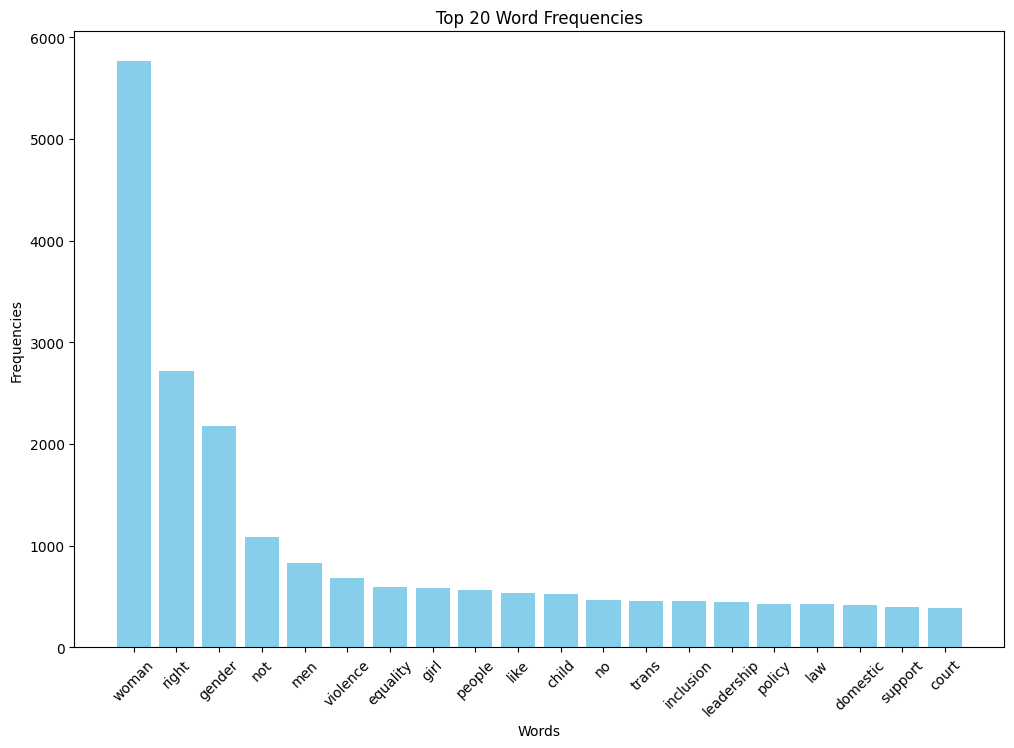

In [38]:
# Visualize the top word counts
import matplotlib.pyplot as plt

# Extract the top 20 words and their frequencies
words = word_frequency.head(20).index
frequencies = word_frequency.head(20).values
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 20 Word Frequencies')
plt.xticks(rotation=45)
plt.show()

**Wordcloud**

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

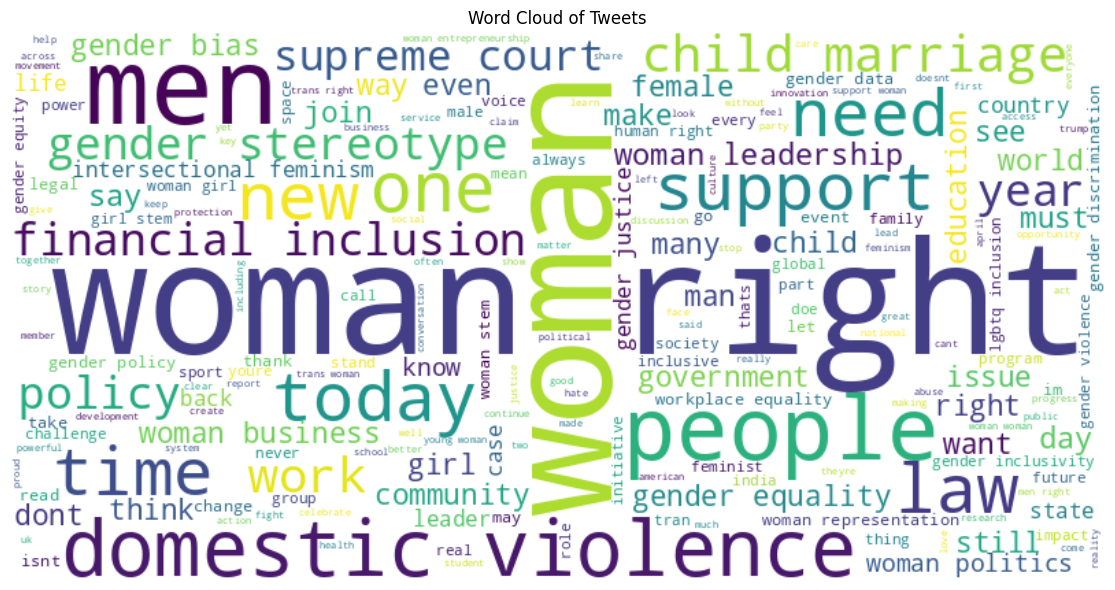

In [40]:
text = " ".join(df['stopword_text'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweets")
plt.tight_layout()
plt.show()

From both the bar chart of most frequent words and the wordcloud visualization as above, it's clear that the most dominant terms being mentioned among tweet under gender equality are "woman," "right," "gender," "violence," "equality," "men," "support," "child" and "policy". This highlights that the public is strongly paying attention to women's rights, gender related violence, child protection, inclusion in gender and legal support for gender equality. These terms not only reflect the central themes in the online discourse but also provide a foundation for deeper analyses such as sentiment tracking or topic modeling to guide advocacy strategies and policy engagement.


# III. TEXT EXTRACTION INSIGHTS

Given clean data in the "stopword_text" column and the intial insights extracted from word frequency above, the next step is to extract deeper insights related to gender equality. This stage aims to uncover the most prominent issues and recurring patterns discussed within the tweets to inform actionable recommendations. To achieve this, a range of techniques will be applied, including N-Gram analysis, tweet count trends over time, sentiment progression, topic modeling, and the use of Generative AI for thematic summarization.

## 1. N-Grams

To begin, the first technique being used in the task is N-grams. This text analysis technique aims to examine sequences of "n" words like bigrams (2 words) and trigrams (3 words) from text content to capture commonly occured phrases or words patterns. From that, it can identify how words occur together as meaningful terms and context, thus undercoving key themes and repeated discussion within text data. In this case, N-grams will be applied as both bigrams and trigrams with the aims to discover key themes and issues being centered by Tweeter uses, thus highlighting most popular gender equality issues and concerns among public.



### 1.1. Bigrams

Firstly, bigrams will be applied on the "stopword_text" column to identify the most frequently occurring two-word combinations, which can reveal commonly discussed topics, key phrases and contextual relationships between terms related to gender equality in the tweets.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
text_data = df['stopword_text']

vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(text_data)

bigrams = vectorizer.get_feature_names_out()
bigram_counts = X.sum(axis=0).A1

bigram_freq = pd.DataFrame({'bigram': bigrams, 'count': bigram_counts})

top_bigrams = bigram_freq.sort_values(by='count', ascending=False).head(20)
top_bigrams.set_index('bigram', inplace=True)

top_bigrams

,count
bigram,
woman right,1730
domestic violence,390
child marriage,259
gender stereotype,246
financial inclusion,235
supreme court,220
woman leadership,214
gender equality,204
woman business,177


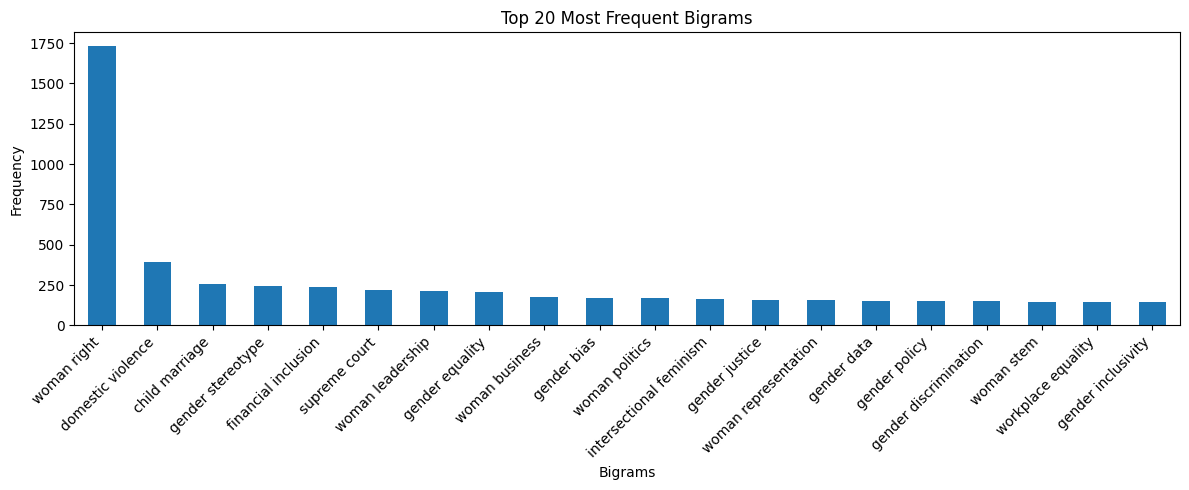

In [43]:
# Plotting the bar chart for top 20 bigrams
plt.figure(figsize=(12, 5))
top_bigrams['count'].plot(kind='bar')
plt.title('Top 20 Most Frequent Bigrams')
plt.ylabel('Frequency')
plt.xlabel('Bigrams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the bigrams analysis and the bar chart illustrating the top 20 most frequent bigrams as above using the "stopword_text" column in the chosen dataset, it's clear that the term "woman right" is the most frequent two-word phrase being discussed among collected tweet content, with 1,730 mentions. This highlights that public discourse around gender equality is heavily centered on women's rights as a core issue, indicating that advocacy, legal protection and empowerment for women remain top priorities in the public’s concern and conversations on social media. In the second place is bigrams of “domestic violence” with 390 mentions, which suggests that  a significant portion of the gender equality discussion on Twitter is focused on addressing abuse and violence at home, in which, victims can be women or even men. This highlights major concerns over safety inside household. In the third place is the bigrams of "child marriage" with 259 mentions. This highlights a strong concern among Twitter users about the ongoing issue of early and forced marriage due to its impacts on girls' rights, education and overall well-being, thus reinforcing the need for legal reforms and advocacy efforts to protect minors. Other popular bigrams like “gender stereotype”, "gender bias" and "gender discrimination" collectively highlight a strong focus on current barriers in society and culture that hinder gender equity, such as the reinforcement of traditional gender roles, unequal treatment in workplaces and education and systemic prejudice that limits opportunities and representation for women. Meanwhile, popular bigrams like "financial inclusion", "woman business”, "woman leadership", "woman politics", and "woman stem" uncover the growing emphasis on empowering women through enhanced access to economic resources, leadership opportunities, political participation and representation in both business and academic, reflecting a shift toward gender-inclusive development and systemic change. Lastly, key bigrams like "gender equality", "gender policy", "gender justice", "supreme court", "workplace equality" and "gender inclusivity" emphasize on-going discussion about the need of institutional and legal frameworks that protect gender equality and provide more inclusive environment and opportunities for both genders.





### 1.2. Trigrams

In [44]:
text_data = df['stopword_text']

vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(text_data)

trigrams = vectorizer.get_feature_names_out()
trigram_counts = X.sum(axis=0).A1

trigram_freq = pd.DataFrame({'trigram': trigrams, 'count': trigram_counts})

top_trigrams = trigram_freq.sort_values(by='count', ascending=False).head(20)
top_trigrams.set_index('trigram', inplace=True)

top_trigrams

,count
trigram,
supreme court ruling,65
uk supreme court,56
right human right,53
support woman right,51
gender equality law,48
right woman right,42
international woman day,40
young woman leadership,39
protecting woman right,34


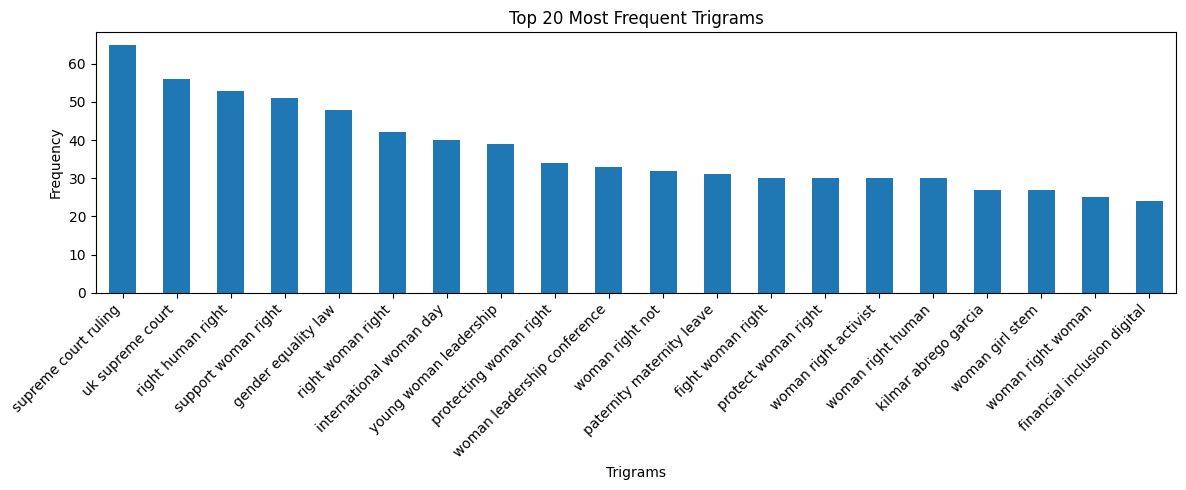

In [45]:
# Plotting the bar chart for top 20 bigrams
plt.figure(figsize=(12, 5))
top_trigrams['count'].plot(kind='bar')
plt.title('Top 20 Most Frequent Trigrams')
plt.ylabel('Frequency')
plt.xlabel('Trigrams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

These trigrams offer deeper, context-specific insights into how gender equality is discussed on Twitter. The frequent appearance of phrases like “support woman right,” “protecting woman right” and “fight woman right” shows that many tweets are not only acknowledging rights but actively calling for advocacy and protection of women’s rights. Terms such as “gender equality law” and “supreme court ruling” point to institutional and legal frameworks being key points of discussion, suggesting that users are engaging with the structural side of gender justice. Meanwhile, “young woman leadership” and “woman leadership conference” emphasize empowerment and the promotion of women in decision-making roles, aligning directly with SDG5’s focus on women’s participation in leadership and public life. The repeated appearance of “kilmar abrego garcia” also suggests a notable case linked to gender or human rights that resonated with users. Compared to bigrams, these trigrams show how people contextualize and act upon gender equality issues, offering a clearer view of the movement’s dynamics and public sentiment.



## 2. Tweet count stats over time

Tweet count stats over time is another text data analysis technique that focuses on uncovering trends in tweet activity overtime through identifying tweet frequency by date. By that, the engement towards topics can be tracked over time, helping to identify its peaks in public interest. In this case, this technique aims to explore how public engagement with content related to gender equality fluctuates over periods to figure out temporal patterns and the peak in its peak interest among Tweeter users for timely actions to address gender equality issues and concerns.

This task will use 2 variables, the first one is the "stopword_text" as it's the clean version of "Text" column after all pre-processing process, the second one is the "day" column which contain the date each tweet being created. While both “day” and “Created_At” contain date information, “Date” is chosen due to its simplified, consistent daily format, making it easier to analyze trends over time without additional processing compared to "Created_At" that has both timestamp and date, which requires extra steps to filter the date out before analysing.









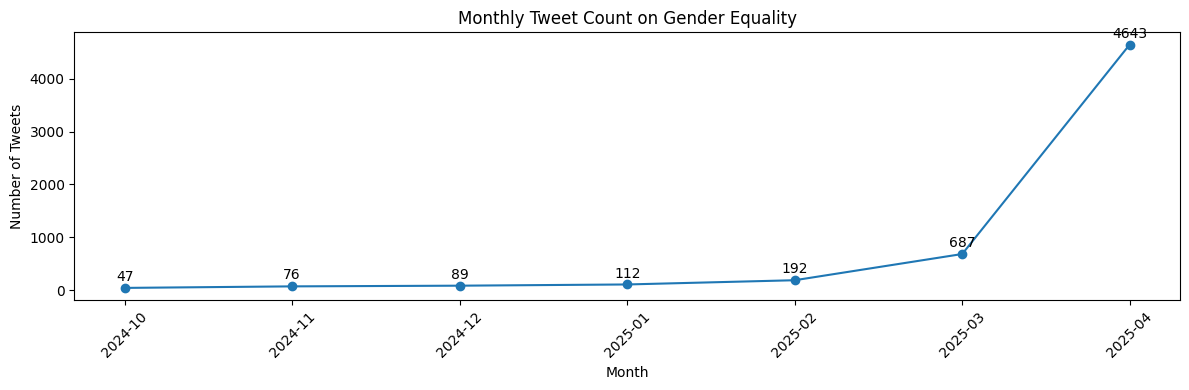

In [46]:
# Group tweet count by month
df['Month'] = pd.to_datetime(df['day']).dt.to_period('M').astype(str)
monthly_counts = df.groupby('Month')['stopword_text'].count().reset_index(name='tweet_count')

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(monthly_counts['Month'], monthly_counts['tweet_count'], marker='o')
plt.title('Monthly Tweet Count on Gender Equality')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')

# Annotate each point with the count
for i, row in monthly_counts.iterrows():
    plt.annotate(row['tweet_count'], (row['Month'], row['tweet_count']), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The line chart shows a sharp rise in gender equality-related tweets, with activity staying relatively low from October 2024 to February 2025, then significantly increasing in March and peaking in April 2025. This suggests heightened public engagement or events during those months that sparked greater discussion on the topic.

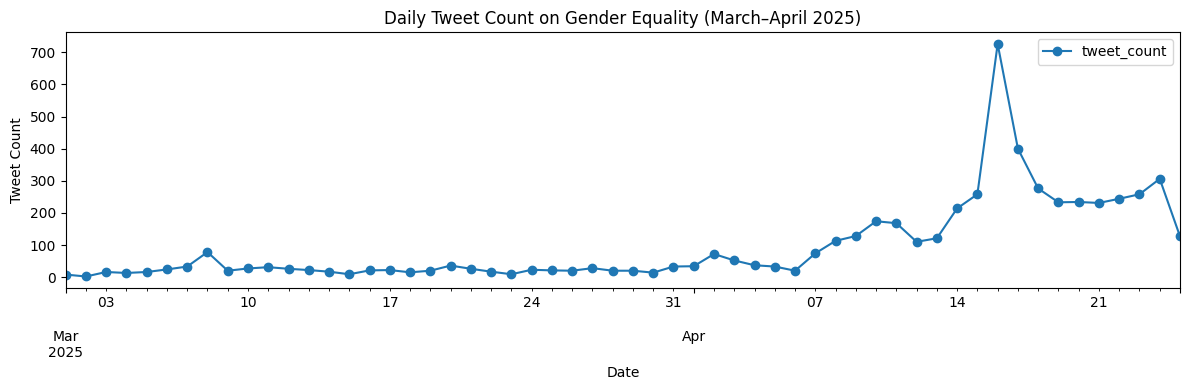

In [47]:
# Filter tweets for March and April only
df_filtered = df[df['day'].dt.month.isin([3, 4])]

# Group by day and count tweets
df_daily_tweet_counts = df_filtered.groupby('day')['stopword_text'].count().reset_index(name='tweet_count')
df_daily_tweet_counts.set_index('day', inplace=True)

# Plot the daily tweet counts
ax = df_daily_tweet_counts.plot(figsize=(12, 4), marker='o')
plt.title('Daily Tweet Count on Gender Equality (March–April 2025)')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.savefig('daily_tweet_count_gender_equality.png', dpi=800)
plt.show()


To further explore the reason behind the intense increase in number of tweets from March to April 2025, another line chart was created as above to count amount of tweet in these months. From that, it’s clear that throughout March, tweet activity remained lower than 100 tweets per day, suggesting moderate engagement during that period. Nonetheless, a slight rise began in early April from 7th to 10th April with around 200 tweets per day, followed by a sharp increase from 14th at over 200 tweets to the peak of over 700 tweets on 16th April. This sudden rise might refer to a major event or public debate related to gender issues that captured widespread attention, which led sustained interest and ongoing conversations on Twitter that results in the fact that despite major drop from 17th, the amount of tweet still stays from over 300 tweets to around 200 tweets per day the rest of the April.

Number of tweets on 16 April 2025: 726


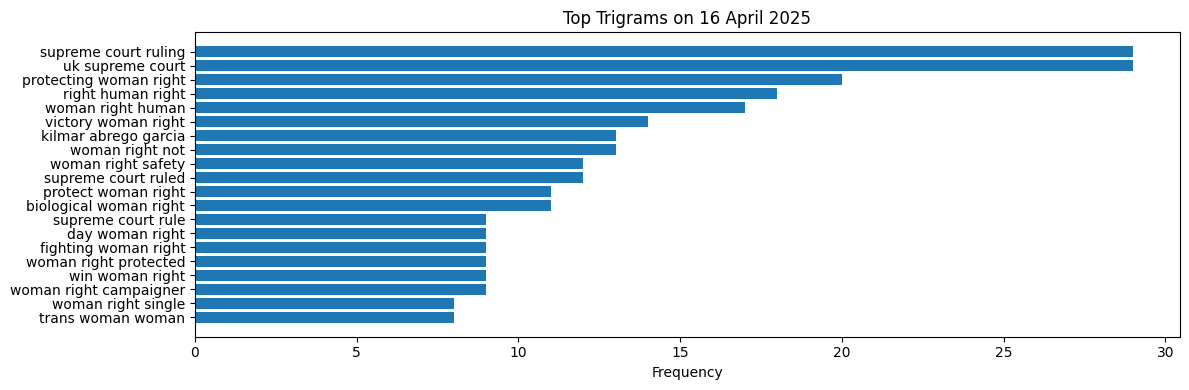

In [48]:
#Filtering for tweets on 16 April 2025
df_april_16 = df[df['day'] == '2025-04-16']
tweet_count_april_16 = len(df_april_16)
print(f"Number of tweets on 16 April 2025: {tweet_count_april_16}")

#Extracting trigrams from the stopword_text column
text_data = df_april_16['stopword_text']
vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=1000)
X = vectorizer.fit_transform(text_data)

trigrams = vectorizer.get_feature_names_out()
trigram_counts = X.sum(axis=0).A1

#Creating DataFrame of trigram frequencies
trigram_freq = pd.DataFrame({'trigram': trigrams, 'count': trigram_counts})
top_trigrams = trigram_freq.sort_values(by='count', ascending=False).head(20)

#Plotting
plt.figure(figsize=(12, 4))
plt.barh(top_trigrams['trigram'], top_trigrams['count'])
plt.xlabel('Frequency')
plt.title('Top Trigrams on 16 April 2025')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


As on 16 April 2025, the number of tweets reached 726 and led to moderate high number of tweets in the followed days, a trigrams analysis was conducted on that day to identify the key theme and concerns being highly discussed on Twitter as shown above. From that, it’s clear that top trigrams like “supreme court ruling”, “uk supreme court”, as well as moderate frequent trigrams like “supreme court ruled” and “biological woman right” referred to the UK Supreme Court’s ruling defining “woman” by biological sex under the Equality Act that in fact happened on 16th April 2025 (Carrell, 2025). This ruling sparked intense public discussion, particularly around transgender rights, legal gender recognition and the definition of womanhood, explaining the spike in tweet activity and sustained attention in the days that followed.

## Sentiment over time

Sentiment overtime is another text analysis technique used to track the change of emotional tone like positive, negative or neutral of text data across a time period through sentiment scores. By that, it can help identify shifts in public attitude to the themes or events for better understanding of engagement patterns and emerging concerns overtime. In this case, this technique can support better identification of public opinion on issues and concerns related to gender equality overtime, thus supporting on time actions.

This technique will use "Text" column which contains original tweet contents before cleaning. This is because this column still retain emotional cues like punctuation, capitalization and emotive words, supporting accurate sentiment scoring. The "day" column will also be used for simplified date data of each tweet being created as discussed above.



In [49]:
# Extract sentiments from the tweets
df['sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

#Display
df[['Text', 'sentiment']].head(20)

,Text,sentiment
0,katy perry and gayle king go for a ride in a s...,0.029545
1,saint dr msg insan started many initiative for...,0.166667
2,she can still be a mother she can still be an ...,0.050000
3,ashram matters it is epicenter of years of sev...,0.000000
4,space mission or pr stunt rich women paid 11m ...,0.243750
5,thank you beautiful warriors for your love and...,0.616667
6,so much for supporting womenthis student tried...,0.225000
7,the girls are hugging and holding hands togeth...,0.000000
8,in todays era women empowerment is key to soci...,0.008333
9,admk stands for humanity unity equality social...,0.169444


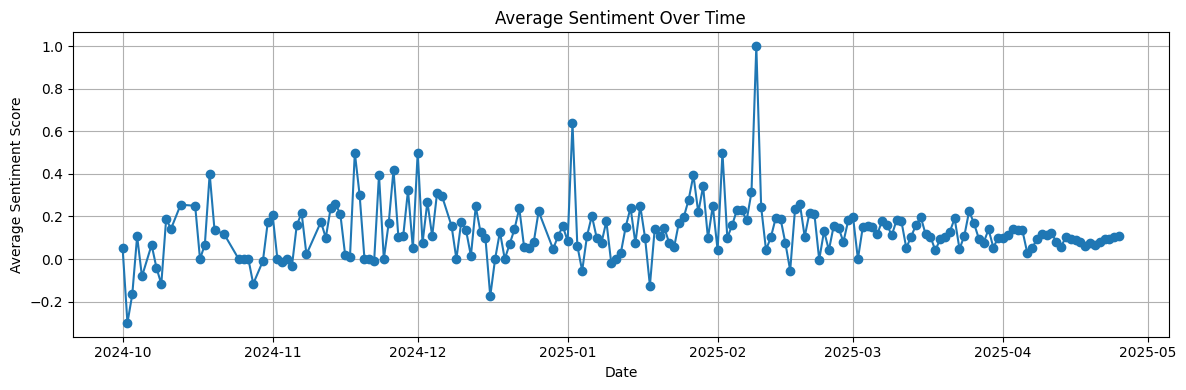

In [50]:
# Group by day and calculate average sentiment
daily_sentiment = df.groupby('day')['sentiment'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(daily_sentiment['day'], daily_sentiment['sentiment'], marker='o', linestyle='-')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()

Given the line chart of daily average sentiment score from October 2024 to April 2025 as shown above, it’s clear that during this period, most daily sentiment scores are around 0 to 0.3 - 0.4, suggesting that tweets related to gender equality often carries neutral to slightly positive attitude among Twitter users. Nonetheless, there are several peaks in sentiment scores, including a significant drop to -0.3 in October 2024, a significant rise to 0.7 in January 2025 and an intense peak to 1 around February 2025. This suggests that in January and February 2025, there might have been an event related to gender equality that generate moderate optimism. Meanwhile, the drop in December may reflect a negative event or controversy that temporarily triggered public sentiment.

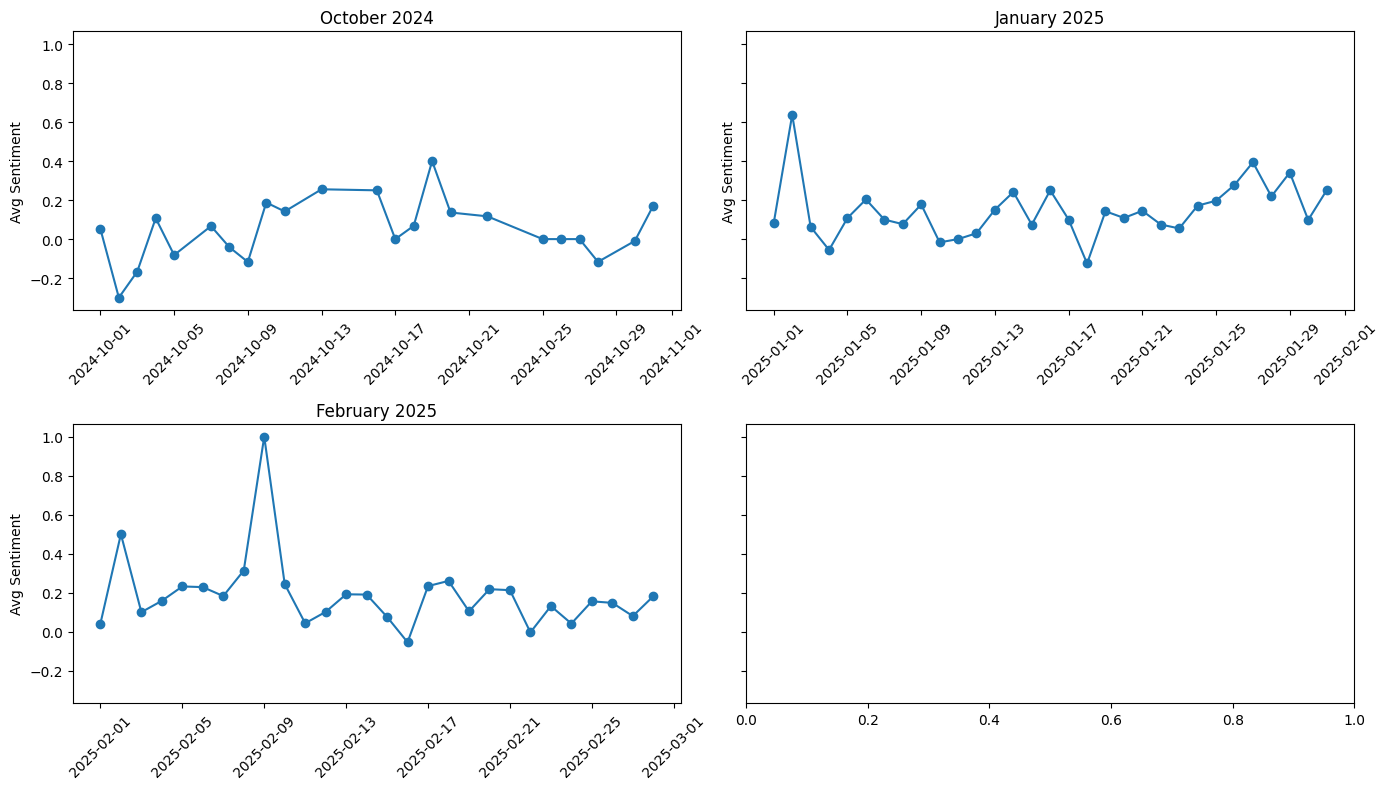

In [51]:
months = {
    "October 2024": (2024, 10),
    "January 2025": (2025, 1),
    "February 2025": (2025, 2)
}

# Plotting sentiment per day for each month
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
axes = axes.flatten()

for i, (title, (year, month)) in enumerate(months.items()):
    monthly_df = df[(pd.to_datetime(df['day']).dt.year == year) & (pd.to_datetime(df['day']).dt.month == month)]
    daily_sentiment = monthly_df.groupby('day')['sentiment'].mean()

    axes[i].plot(daily_sentiment.index, daily_sentiment.values, marker='o')
    axes[i].set_title(title)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel("Avg Sentiment")

plt.tight_layout()
plt.show()


To further explore the reason behind the peak in both negative and positive sentiment among tweet content during those months, 3 more line charts were created as above to identify the specific day where these daily average sentiment scores peaked. From that, it’s clear that the average sentiment score dropped to the lowest over period at -0.3 on 2nd October 2024, while the score reached to the highest of 0.7 and 1 on 2nd January and 9th February 2025 respectively.

In [52]:
# Set column width to display full text
pd.set_option('display.max_colwidth', None)

dates = {
    "2 October 2024": "2024-10-02",
    "2 January 2025": "2025-01-02",
    "9 February 2025": "2025-02-09"
}

# Display
for label, date_str in dates.items():
    date = pd.to_datetime(date_str)
    tweets_on_date = df[df['day'] == date][['Text']].reset_index(drop=True)
    print(f"Tweets on {label}:\n")
    display(tweets_on_date)
    print("\n" + "="*80 + "\n")


Tweets on 2 October 2024:



,Text
0,the hr database in our company is so terrible that one of my colleagues was marked as having taken both paternity and maternity leave she is a woman
1,unfairly limiting a fathers time with children is unjust advocate for balanced custody rights ensure fairness and parental equality stand for parental rights legal questions seek guidance at terms apply




Tweets on 2 January 2025:



,Text
0,we are proud to have been recognized as a top employer for lgbt inclusion by the india workplace equality index at zs we believe that a successful workplace is one where everyone can thrive learn more




Tweets on 9 February 2025:



,Text
0,if pan africanism was in our best interests it wouldnt have institutional backingit wouldnt be taught at universities alongside intersectional feminism and lgbt


From that, it’s clear that on 2nd October 2024, there were 2 tweets, one was about error in marking gender in the workplace that led a female worker having both paternity and maternity leave, while the other one uncovers concerns in limited parental leaves for male workers. These both highlight the common concern of gender misclassification and inequality in parental leave policies in workplace, therefore although they were posts with the aim to advocate for equality, their wording highlights injustice and frustration from users, thus explaining significant negative sentiment score of -0.3 on this day. This then reflects dissatisfaction with current parental policies in workplace that negatively impact on all genders workers. One the other hand, on 2nd January 2025, there was only one tweet about celebration for recognizing LGBT inclusion in the workplace. The use of positive and celebrated words such as “proud”, “successful” and “thrive” aligns with the high sentiment score of 0.7 on this day, reflecting the feeling of proud and encouragement for equality and inclusion in workplace. Lastly, on 9th February 2025, there was only one post that criticized the institutional support for social justice movements like Pan-Africanism, intersectional feminism and LGBT rights, suggesting these causes might just be theorical in school because they are backed by powerful institutions like universities, but not truly serve marginalized groups' best interests. Therefore, the perfect positive sentiment score from this tweet might be due to misinterpretation from the use of two negatives like “wouldn’t,” as the tweet is clearly a critique post. This then highlights the limitation of TextBlob library as sentiment analysis tools in accurately capturing sarcasm, complex opinions and subtle criticism in social media content. Nonetheless, this tweet still highlights the ongoing concerns of performative activities related to gender equality, where institutions may support social justice movements in theory through teaching, but not sufficient to deliver meaningful change for major amount of individuals in the society in practice.

## Topic modelling

Topic modelling is a text analysis technique used to automatically discover the main themes or topics in a large set of documents by identifying patterns of word co-occurrence. It groups related terms into clusters or topics, helping to summarize and understand dominant themes in unstructured text data. In this case, topic modelling helps uncover the most discussed topics related to gender equality in tweets without manually reading each tweet or manually clustering them through word frequency, bigrams or trigrams. This therefore allows quicker insight into public concerns, emerging discussion and areas, thus supporting faster  attention and actions from policymakers or advocacy groups to ensure gender equality.

To work on this technique, the "stopword_text" will be used again to ensure the text data is clean and standardized. The tool used in this task is a topic modelling algorithm named LDA (Latent Dirichlet Allocation) to discover the underlying topics being discussed in gender equality tweets without supervision, making the process more efficient.

In [53]:
import tempfile
import logging

# Setting up the environment for LDA algorithm.
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


In [54]:
# Convert the tweets as the text corpus.
corpus = list(df['stopword_text'])

In [55]:
corpus[:5]

['katy perry gayle king go ride shaped rocket support woman empowerment isnt funny climate activist fit agenda professor chemistry air quality university college say take minute space travel least much carbon individual bottom billion entire lifetime dont want hear word katy perry gayle king climate destroyed carbon woman sum celebrity space ride',
 'saint dr msg insan started many initiative woman empowerment necessary today every girl know basic tip self defense',
 'still mother still entrepreneur still everything marriage baby shes still top game managing personal professional life together broke stereotype became icon woman empowerment',
 'matter year seva includes uplifting future nation woman empowerment mahila mandal preserving youth seva order denial',
 'space mission pr stunt rich woman paid min calling win woman empowerment isnt photo op real woman stem lead mission build rocket outdated marketing']

In [56]:
# Tokenization
tweet_texts = [[word for word in str(document).split()] for document in corpus]

In [57]:
tweet_texts[:5]

[['katy',
  'perry',
  'gayle',
  'king',
  'go',
  'ride',
  'shaped',
  'rocket',
  'support',
  'woman',
  'empowerment',
  'isnt',
  'funny',
  'climate',
  'activist',
  'fit',
  'agenda',
  'professor',
  'chemistry',
  'air',
  'quality',
  'university',
  'college',
  'say',
  'take',
  'minute',
  'space',
  'travel',
  'least',
  'much',
  'carbon',
  'individual',
  'bottom',
  'billion',
  'entire',
  'lifetime',
  'dont',
  'want',
  'hear',
  'word',
  'katy',
  'perry',
  'gayle',
  'king',
  'climate',
  'destroyed',
  'carbon',
  'woman',
  'sum',
  'celebrity',
  'space',
  'ride'],
 ['saint',
  'dr',
  'msg',
  'insan',
  'started',
  'many',
  'initiative',
  'woman',
  'empowerment',
  'necessary',
  'today',
  'every',
  'girl',
  'know',
  'basic',
  'tip',
  'self',
  'defense'],
 ['still',
  'mother',
  'still',
  'entrepreneur',
  'still',
  'everything',
  'marriage',
  'baby',
  'shes',
  'still',
  'top',
  'game',
  'managing',
  'personal',
  'professiona

In [58]:
!pip install gensim

In [59]:
import gensim
from gensim import corpora
from gensim import models
import os

# in the case this chunk code crash, please run the first chunk code to make sure the numpy matches with gensim

In [60]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(tweet_texts)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'tweets.dict'))

In [61]:
corpus = [dictionary.doc2bow(text) for text in tweet_texts]

In [62]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]

In [63]:
from gensim.models import LdaModel

lda_model_tfidf = models.LdaModel(corpus_tfidf, num_topics=5, id2word=dictionary, passes=10, random_state=42)

In [64]:
topics = lda_model_tfidf.print_topics(num_words=5)
for i, topic in topics:
    print(f"Topic #{i}: {topic}")

Topic #0: 0.012*"right" + 0.008*"woman" + 0.008*"men" + 0.008*"not" + 0.008*"trans"
Topic #1: 0.004*"feminism" + 0.004*"politics" + 0.003*"intersectional" + 0.003*"dei" + 0.002*"right"
Topic #2: 0.006*"right" + 0.005*"woman" + 0.003*"stem" + 0.003*"love" + 0.003*"support"
Topic #3: 0.006*"gender" + 0.004*"woman" + 0.004*"violence" + 0.004*"equality" + 0.003*"law"
Topic #4: 0.007*"business" + 0.006*"stem" + 0.005*"girl" + 0.005*"gender" + 0.005*"leadership"


In [65]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.6 MB/s eta 0:00:00


In [66]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization
lda_display = gensimvis.prepare(lda_model_tfidf, corpus_tfidf, dictionary)

# Display it inline (for Jupyter/Colab)
pyLDAvis.display(lda_display)

In [67]:
# Get the dominant topic for each tweet
dominant_topics = [max(lda_model_tfidf.get_document_topics(doc), key=lambda x: x[1])[0] for doc in corpus_tfidf]

# Save as a single-column DataFrame
lda_topics_df = pd.DataFrame({"topic": dominant_topics})

# Export to CSV
lda_topics_df.to_csv("lda_topic_assignments.csv", index=False)

#this data will be used later in Hugging Face analysis

## Generative AI

The last NLP technique used in this text insights extraction report is the combination between emotional classification and topic modelling, aiming to uncover not only what gender-related topics are being discussed but also the emotional tone associated with each topic. This integrated approach provides deeper insights into public sentiment across specific themes, revealing how people feel about issues such as women's rights, gender-based violence, or transgender inclusion, whether with anger, admiration, sadness, or joy, and allowing for more targeted, empathetic responses from policymakers and advocates.
The input for this task is the “Text” column, which contains the original tweet content. This version of the data is used because it retains emotional cues such as punctuation, capitalization, and expressive language, all of which support more accurate emotional scoring. For the emotion classification, the SamLowe/roberta-base-go_emotions model from Hugging Face was selected. This is a RoBERTa-based model fine-tuned on the comprehensive GoEmotions dataset, making it well-suited for identifying a wide range of emotional expressions. To ensure reliable performance and prevent execution failures due to long text inputs or large dataset size (over 500 entries), the model was implemented using a batching strategy with automatic truncation enabled. This approach ensures that each tweet stays within the model’s 512-token limit while also improving computational efficiency across the classification process. To support this task, Generative AI tool of ChatGPT was used to support in generating Python code, ensuring minor error will be made.

This need session need to be changed into GPU as runtime type

**Emotional Classification using Hugging Face model**

In [68]:
# Reinstall specific numpy version and upgrade JAX and TensorFlow
!pip install numpy==1.26.0 --upgrade --force-reinstall
!pip install --upgrade jax jaxlib
!pip install --upgrade tensorflow

#After this, may restart the session then continue to run the code as current numpy version doesn't support transformer

#Then re-run the Data Loading section (only that) to get the data

  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, which is not installed.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.
  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (644.9 MB)
ERROR: pip's de

In [69]:
!pip install transformers --quiet

In [70]:
from transformers import pipeline

classifier = pipeline(
    "text-classification",
    model="SamLowe/roberta-base-go_emotions",
    top_k=1,             # return top 1 predicted emotion
    truncation=True,     # auto-truncate long texts to 512 tokens
    padding=True         # ensures uniform input sizes in batch
)

# in the case this chunk code crash, please run the first chunk code in this session to make sure the numpy matches with transformers

Device set to use cuda:0


In [71]:
from tqdm import tqdm

In [72]:
# This code was generated by ChatGPT
# Batch processing function
def batch_emotion_classification(texts, batch_size=100):
    results = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size].tolist()
        try:
            preds = classifier(batch)
            labels = [p[0]['label'] for p in preds]
            scores = [p[0]['score'] for p in preds]
        except Exception as e:
            print(f"Batch {i}-{i+batch_size} failed: {e}")
            labels = ["error"] * len(batch)
            scores = [0.0] * len(batch)
        results.extend(zip(labels, scores))
    return results

In [73]:
# Apply classification
predicted = batch_emotion_classification(df["Text"])

100%|██████████| 59/59 [01:34<00:00,  1.60s/it]


In [74]:
# Add to DataFrame
df["emotion_label"] = [x[0] for x in predicted]
df["emotion_score"] = [x[1] for x in predicted]

df[["Text", "emotion_label", "emotion_score"]].head()

,Text,emotion_label,emotion_score
0,katy perry and gayle king go for a ride in a shaped rocket to support women empowerment isnt it funny how they are only climate activists when it fits their agenda eloise marais a professor of atmospheric chemistry and air quality at university college says it only takes a few minutes in space travel to emit at least as much carbon as an individual from the bottom billion will emit in their entire lifetime i dont want to hear any other word from katy perry or gayle king about how our climate is being destroyed by carbon emissions these women humorously sum up the celebrity space ride,amusement,0.658415
1,saint dr msg insan started many initiative for women empowerment its necessary today to every girl that she know basic tips of self defense,neutral,0.587217
2,she can still be a mother she can still be an entrepreneur she can still do everything after marriage amp having babies shes still top of the game managing her personal amp professional life together she broke all the stereotypes and became an icon of women empowerment,approval,0.407759
3,ashram matters it is epicenter of years of seva that includes uplifting future of nation through bal sanskar kendras women empowerment through mahila utthan mandal preserving youth through yuva seva sangh order of demolition of ashram is denial of,neutral,0.917724
4,space mission or pr stunt rich women paid 11m to float for min calling it a win for women empowerment isnt a photo op real women in stem lead missions build rockets this was outdated marketing,neutral,0.465279


In [75]:
# Display emotion label counts as a table
emotion_counts = df["emotion_label"].value_counts().reset_index()
emotion_counts.columns = ["emotion", "count"]
emotion_counts

,emotion,count
0,neutral,3882
1,admiration,329
2,approval,325
3,gratitude,209
4,disapproval,132
5,curiosity,95
6,annoyance,94
7,excitement,83
8,joy,82
9,sadness,80


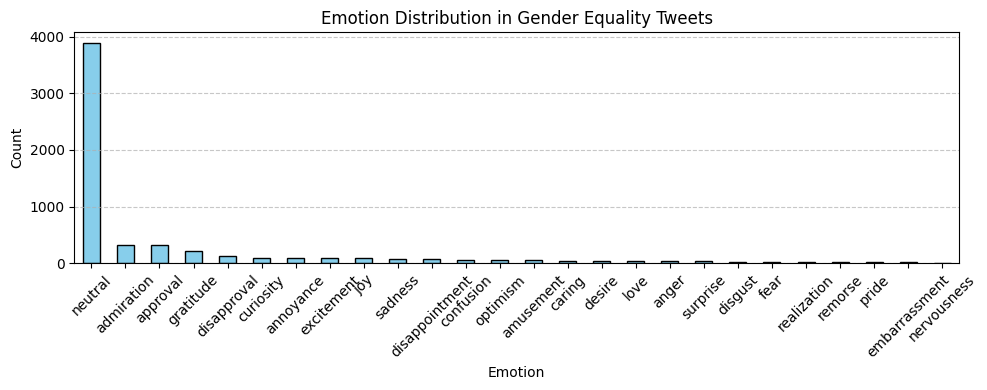

In [76]:
#Plotting emotion counts
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Bar chart of emotion label counts
df["emotion_label"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")

# Add labels and title
plt.title("Emotion Distribution in Gender Equality Tweets")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

**LDA topic modelling combining with emotional analysis**

In [78]:
# Load the topic assignments
lda_topics = pd.read_csv("lda_topic_assignments.csv")

# Assuming your emotion_df already has the same order
df = df.reset_index(drop=True)
lda_topics = lda_topics.reset_index(drop=True)

# Merge topic into your emotion DataFrame
df["topic"] = lda_topics["topic"]


In [85]:
#This code is generated by ChatGPT

# Filter out neutral rows
df_filtered = df[df["emotion_label"] != "neutral"]

# Group and count
grouped = df_filtered.groupby(["topic", "emotion_label"]).size().reset_index(name="count")

# For each topic, get top 5 emotions
top5_per_topic = grouped.sort_values(["topic", "count"], ascending=[True, False]) \
                        .groupby("topic").head(5)


top5_table = top5_per_topic.pivot(index="topic", columns="emotion_label", values="count").fillna(0).astype(int)
top5_table


emotion_label,admiration,annoyance,approval,confusion,curiosity,disappointment,disapproval,excitement,gratitude,joy,sadness
topic,,,,,,,,,,,
0,56,54,125,0,0,0,78,0,60,0,0
1,16,0,11,8,0,0,9,0,9,0,0
2,16,12,18,0,0,9,16,0,0,0,0
3,66,0,85,0,23,0,0,0,46,0,33
4,175,0,86,0,0,0,0,72,86,39,0


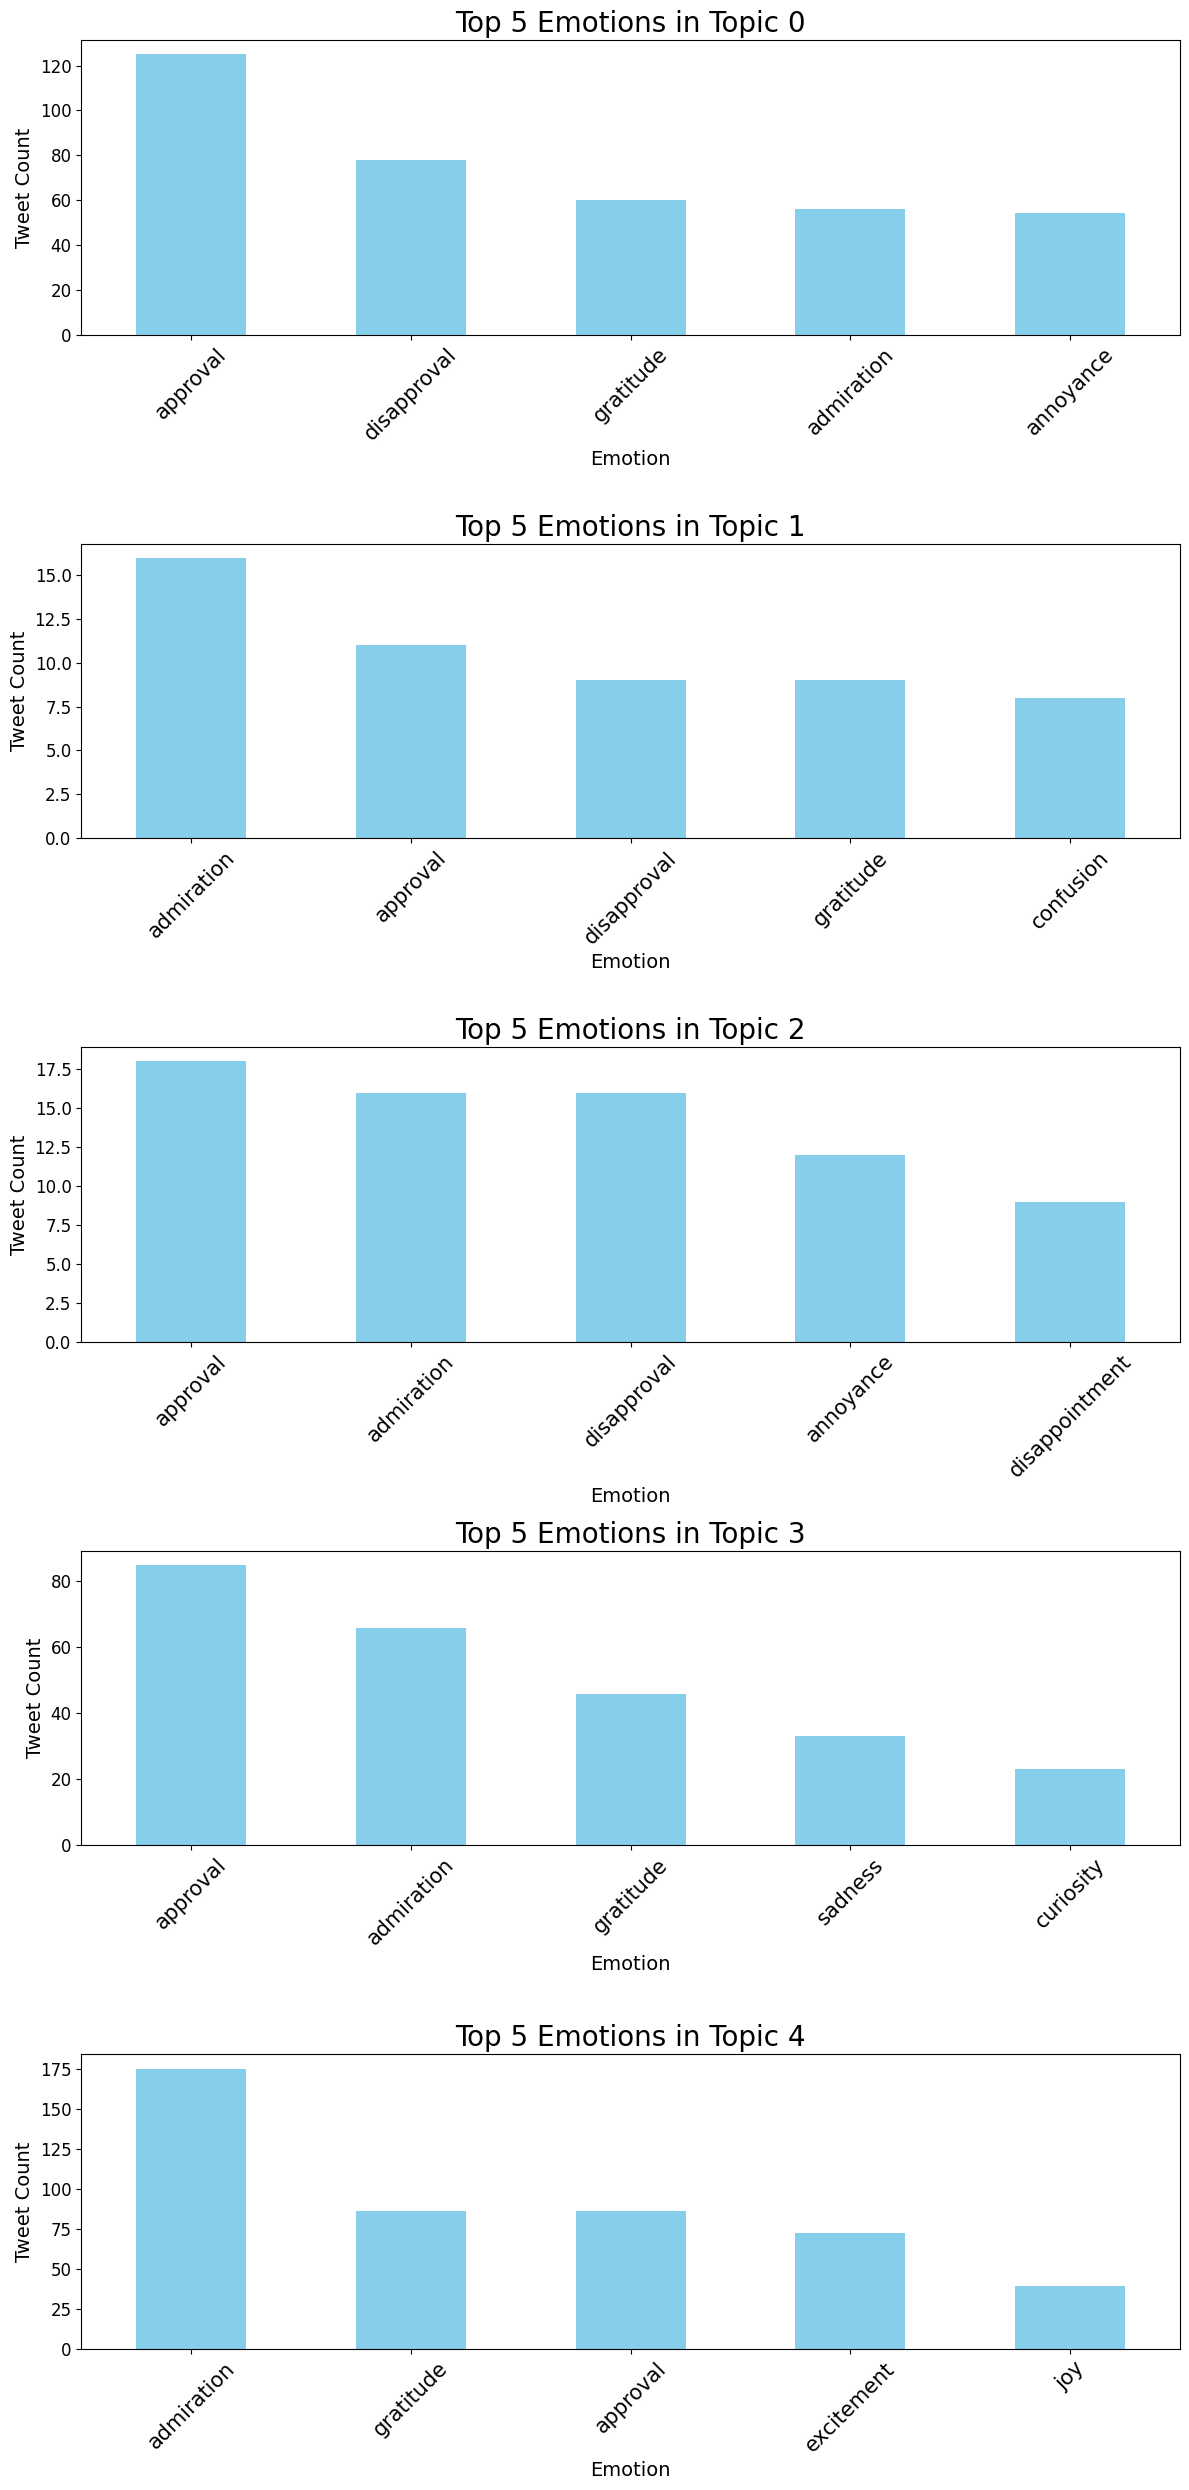

In [90]:
import matplotlib.pyplot as plt

# Loop through each topic and plot its top 5 emotions
unique_topics = sorted(df_filtered["topic"].unique())

# Set figure size based on number of topics
fig, axes = plt.subplots(len(unique_topics), 1, figsize=(12, 5 * len(unique_topics)))

for i, topic in enumerate(unique_topics):
    topic_df = df_filtered[df_filtered["topic"] == topic]
    top_emotions = topic_df["emotion_label"].value_counts().nlargest(5)

    ax = axes[i] if len(unique_topics) > 1 else axes
    top_emotions.plot(kind='bar', ax=ax, color="skyblue")

    ax.set_title(f"Top 5 Emotions in Topic {topic}", fontsize=20)
    ax.set_xlabel("Emotion", fontsize=14)
    ax.set_ylabel("Tweet Count", fontsize=14)
    ax.tick_params(axis='x', labelsize=15, rotation=45)
    ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()



In [91]:
# Merge bigrams and emotion
df["bigram"] = df["stopword_text"].apply(lambda x: " ".join(x.split()[:2]))  # or use CountVectorizer

# Group by bigram + emotion
df.groupby(["bigram", "emotion_label"]).size().unstack().fillna(0)


emotion_label,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,joy,love,nervousness,neutral,optimism,pride,realization,remorse,sadness,surprise
bigram,,,,,,,,,,,,,,,,,,,,,
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
11th annual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11th april,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19th february,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1st day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zambia malawi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
zambian access,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
zero mainstream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
